In [1]:
import numpy as np
import sys, os
sys.path.append('../../shared/utilsGRF/')
from IPython.display import display
import writescripts 

In [3]:
edges=[(1,'a1',2),(2,'a2',3),(3,'a3',4),(4,'a4',5),(5,'a5',1),
       (6,'alpha1',7),(7,'alpha2',8),(8,'alpha3',9),(9,'alpha4',10),(10,'alpha5',6),
      (1,'kb1-x',6),(6,'ku1',1),(2,'kb2-x',7),(7,'ku2',2),(3,'kb3-x',8),(8,'ku3',3),(4,'kb4-x',9),(9,'ku4',4),(5,'kb5-x',10),(10,'ku5',5)]

MTTfolder='../../shared/utilsGRF' #folder with MTT.py 
basename='graph'

parlist=[x[1] for x in edges]
parlist=list(set(parlist))


list(set(parlist))

for pnum,par in enumerate(parlist):
    if '-x' in par:
        parlist[pnum]=parlist[pnum].replace('-x','')
print(parlist)

obj=writescripts.PrepareFilesNoneq(edgelist=edges,varGRF='x',concvars=['x'],parlist=parlist,MTTfolder=MTTfolder,graphbasename=basename)
obj.write_execute_parse()

obj.simpify_rhos()

['alpha5', 'kb1', 'a2', 'a4', 'kb2', 'alpha1', 'a1', 'ku4', 'alpha4', 'ku2', 'kb3', 'kb4', 'alpha3', 'ku3', 'a3', 'ku5', 'ku1', 'kb5', 'a5', 'alpha2']
executing MTT
0


In [4]:
import sympy
from sympy.parsing.sympy_parser import parse_expr

In [5]:
sympy.init_printing()

In [6]:
for label in parlist:
    #print(label)
    exec("%s=sympy.symbols('%s')"%(label,label))
for var in ['x']:
    exec("%s=sympy.symbols('%s')"%(var,var))
epsilon1,epsilon2,epsilon3,epsilon4,epsilon5,kb,ku,a=sympy.symbols('epsilon_1,epsilon_2,epsilon_3,epsilon_4,epsilon_5,k_b,k_u,a')
all_rhos_sympy=[]
for rho in obj.all_rhos:
    expr=parse_expr(rho.split("=")[1])
    expr_simple=expr.subs({alpha1:epsilon1*a1,alpha2:epsilon2*a2,alpha3:epsilon3*a3,alpha4:epsilon4*a4,alpha5:epsilon5*a5,kb1:kb,kb2:kb,kb3:kb,kb4:kb,kb5:kb,ku1:ku,ku2:ku,ku3:ku,ku4:ku,ku5:ku})
    expr_simple=expr_simple.subs({a1:a,a2:a,a3:a,a4:a,a5:a})
    all_rhos_sympy.append(expr_simple)

In [12]:
for nkb in range(1,6)[::-1]:
    print(nkb, "Trees for nodes bound")
    treesbound=[]
    treesunbound=[]
    for i in range(6,6+5):
        for tree in sympy.Add.make_args(all_rhos_sympy[i-1]):
            polykb=sympy.Poly(tree,kb)
            if polykb.degree()==nkb:
                #print(tree)
                treesbound.append(tree)
    print(nkb-1,"Trees for nodes unbound")
    for i in range(1,6):
        
        for tree in sympy.Add.make_args(all_rhos_sympy[i-1]):
            polykb=sympy.Poly(tree,kb)
            if polykb.degree()==nkb-1:
                #print(tree)
                treesunbound.append(tree)
    #print(treesbound)
    print("testing equality",len(treesbound),len(treesunbound))
    matching=set()
    #unmatching=set()
    for t in range(len(treesbound)):
        tree=treesbound[t]
        for t2 in range(len(treesunbound)):
            treeu=treesunbound[t2]
            if tree*ku/(kb*x)==treeu:
                print("equal",t,t2)
                matching.add(t)
    for t in range(len(treesbound)):
        tree=treesbound[t]
        if not t in matching:
            print(tree)
            #else:
            #    print("nonequal", treeu*kb*x/ku, treesbound[t2])
    
            #print(tree)
        #print()

5 Trees for nodes bound
4 Trees for nodes unbound
testing equality 5 5
equal 0 0
equal 1 1
equal 2 2
equal 3 3
equal 4 4
4 Trees for nodes bound
3 Trees for nodes unbound
testing equality 25 30
equal 0 0
equal 0 27
equal 1 1
equal 1 21
equal 2 2
equal 2 15
equal 3 3
equal 3 9
equal 5 6
equal 5 26
equal 6 7
equal 6 20
equal 7 8
equal 7 14
equal 8 3
equal 8 9
equal 10 12
equal 10 25
equal 11 13
equal 11 19
equal 12 8
equal 12 14
equal 13 2
equal 13 15
equal 15 18
equal 15 24
equal 16 13
equal 16 19
equal 17 7
equal 17 20
equal 18 1
equal 18 21
equal 20 18
equal 20 24
equal 21 12
equal 21 25
equal 22 6
equal 22 26
equal 23 0
equal 23 27
5*a**5*epsilon_2*epsilon_3*epsilon_4*epsilon_5*k_b**4*x**4
5*a**5*epsilon_1*epsilon_3*epsilon_4*epsilon_5*k_b**4*x**4
5*a**5*epsilon_1*epsilon_2*epsilon_4*epsilon_5*k_b**4*x**4
5*a**5*epsilon_1*epsilon_2*epsilon_3*epsilon_5*k_b**4*x**4
5*a**5*epsilon_1*epsilon_2*epsilon_3*epsilon_4*k_b**4*x**4
3 Trees for nodes bound
2 Trees for nodes unbound
testing equal

In [7]:
phi1=all_rhos_sympy[0]
phi2=all_rhos_sympy[1]
phi3=all_rhos_sympy[2]
phi4=all_rhos_sympy[3]
phi5=all_rhos_sympy[4]
phi6=all_rhos_sympy[5]

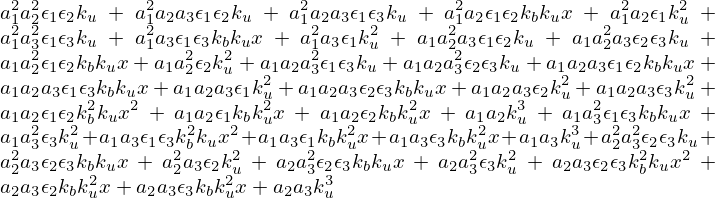

In [8]:
phi1+phi2+phi3

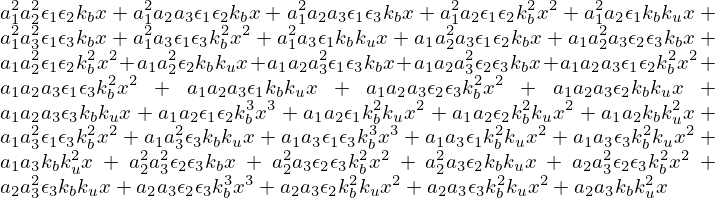

In [9]:
phi4+phi5+phi6

In [10]:
num=a3*phi3+a3*epsilon3*phi6
den=phi1+phi2+phi3+phi4+phi5+phi6

In [11]:
dnum=sympy.diff(num,x)
dden=sympy.diff(den,x)

In [12]:
#left=(sympy.diff(phi3,ku)+alpha3*sympy.diff(phi6,ku))*den
#right=(phi3+alpha3*phi6)*dden
left=dnum*den
right=num*dden

In [13]:
#B=sympy.symbols('B')

In [14]:
l_r=sympy.expand(left-right)
#l_rB=l_r.subs(kb*x,B)
poly_zero=sympy.Poly(l_r,x)


In [15]:
poly_zero

In [16]:
from sympy.printing import mathematica

In [17]:
math_output=open("tocheckwithm_nonmx_3steps_norev.in","w")
all_terms=[]
for cn,coeff in enumerate(poly_zero.coeffs()[::-1]):
    termsc=[]
    print(cn)
    for monomial in sympy.Add.make_args(coeff):
        #print(monomial, sympy.Mul.make_args(monomial))
        noneps=[]
        eps=[]
        number=1
        eps_base=[] #bases, for ordering by letter
        noneps_base=[] #bases, for ordering by letter
        args= sympy.Mul.make_args(monomial) #separate each monomial into each variable (a,epsilon,number)
        for arg_ in args:
            if type(arg_)==sympy.power.Pow:
                arg=sympy.power.Pow.as_base_exp(arg_)[0] #get the base of the power so that I can check if it is epsilon or not
            else:
                arg=arg_
            if  arg in [epsilon1,epsilon2,epsilon3]:
                eps.append(arg_)
                eps_base.append(arg.name)
            else:
                
                #print(type(arg))
                if type(arg)!=sympy.numbers.Integer and type(arg)!=sympy.numbers.NegativeOne:
                    noneps_base.append(arg.name)
                    noneps.append(arg_)
                else:
                    number=arg
                    
        #print(monomial)
        #print(number)
        noneps_o=np.array(noneps)[np.argsort(np.array(noneps_base))]
        eps_o=np.array(eps)[np.argsort(np.array(eps_base))]
        #print(number,noneps_o,eps_o)
        termsc.append([number,noneps_o,eps_o])
    all_terms.append(termsc)

for i in range(len(all_terms)):
    print("degree ",i)
    coeffi=all_terms[i]
    #print(coeffi)
    base=[] #list of common factors that do not contain epsilons
    #find the unique common factors without epsilons
    for j in range(len(coeffi)):
        b=coeffi[j][1]
        present=False
        for k in range(len(base)):
            if np.all(base[k]==b):
                present=True
        if not present:
            base.append(b)
    #find which term in the original coefficient expression correspond to each common factor
    common_bases_idx=[[] for i in range(len(base))] #which terms have those common factors
    for j in range(len(coeffi)):
        b=coeffi[j][1]
        for k in range(len(base)):
            if np.all(base[k]==b):
                common_bases_idx[k].append(j)
    #now for each base, print the epsilon terms side by side to check which sign wins 
    print(len(base))
    for k in range(len(base)):
        #print(base[k])
        idxs=common_bases_idx[k]
        epsilons_terms=0
        for idx in idxs:
            terms=coeffi[idx]
            #print(terms)
            number=terms[0]
            epsilons=terms[2]
            prod=1
            for e in epsilons:
                prod*=e

            #if np.abs(number)==1:
            epsilons_terms+=number*prod
            #else:
            #    if number<1:
            #        sign=-1
            #    else:
            #        sign=1
            #    for k in range(np.abs(number)):
            #        epsilons_terms+=sign*prod
        #display(epsilons_terms)
        #display(idx,sympy.factor(epsilons_terms),epsilons_terms)
        math_output.write(str(i)+";"+mathematica.mathematica_code(epsilons_terms).replace("_","")+"\n")
math_output.close()
        
#print(base)
#print(common_bases_idx)
    
        
#then identify together those with same noneps
#common together epsilons with the number (Integer)

0
1
2
3
4
degree  0
44
degree  1
34
degree  2
22
degree  3
10
degree  4
3


In [20]:
44+34+22+10+3